# Used car price prediction
## Prepared by:
## Kateryna Kondratovych and Claudia Słaboń

The project is divided into sections:
- Introduction
- Missing Values
- Descriptive Analysis
- Variable Selection and Transformation
- Training/test data division, cross-validation
- Usage of Chosen Method on test data
- Summary and Conclusions


## Introduction

In this project we tried to predict price of used cars. Our dependant variable is price which is continuous variable.We decided to take a logarithm of Price, as kurtosis and skewness were quite high. We transform some dependant variables to float type and other to binary. We deleted variable New_Price as it has too many missing values and do predictions for missing values in other columns.Then, we deleted some outliers. For our final model, we used only variables which have high correlation to dependant variable, but low between themselves. Then we divide our dataset to test and validation ones and do cross-validation of different Machine Learning methods, such as Linear Regression, kNN, SVM. In the end we chose kNN method and do prediction on test dataset. 

Importing datasets

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import path
import re
import pickle
from sklearn.model_selection import train_test_split
import random
plt.style.use('seaborn-ticks')
%matplotlib inline
import pylab
import gc
import math
import statsmodels.api as sm
import numpy as np
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn import neighbors
from sklearn.svm import SVR

Importing dataset and spliting it into train and test

In [175]:
df_o = pd.read_csv("train-data.csv")
df = df_o.copy()

X_train, X_test, y_train, y_test = train_test_split(df, df.Price, test_size=0.2, random_state=0)
X_testF = X_test.copy()

Let's check dataset 

In [176]:
X_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3509,3509,Hyundai i20 Asta Option 1.4 CRDi,Coimbatore,2017,24153,Diesel,Manual,Second,22.54 kmpl,1396 CC,88.73 bhp,5.0,NaN,9.18
3332,3332,Mahindra Quanto C6,Mumbai,2013,35000,Diesel,Manual,First,17.21 kmpl,1493 CC,100 bhp,7.0,NaN,3.49
5383,5383,Tata Indigo LX BSII,Hyderabad,2005,92000,Diesel,Manual,Second,16.1 kmpl,1405 CC,70 bhp,5.0,NaN,1.10
1891,1891,Maruti Swift Ldi BSIV,Delhi,2014,62000,Diesel,Manual,First,17.8 kmpl,1248 CC,75 bhp,5.0,NaN,3.75
5757,5757,Toyota Innova Crysta 2.4 VX MT,Kolkata,2017,31000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,21.36 Lakh,16.95


In [177]:
X_train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,4815.000000,4815.000000,4.815000e+03,4785.000000,4815.000000
mean,3005.682243,2013.369055,5.915726e+04,5.274399,9.429570
std,1740.652164,3.286841,1.005633e+05,0.804034,11.246342
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1493.000000,2011.000000,3.349050e+04,5.000000,3.500000
50%,2996.000000,2014.000000,5.308000e+04,5.000000,5.600000
75%,4523.500000,2016.000000,7.300000e+04,5.000000,9.775000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


One can see that ID column is unnamed and in some columns we have not only the value of the variable, but also measure of it. Therefore, we should delete these measures                                                                                      <br>Also one can see that in Power variable we have as well null bhp. Therefore, we change null to NA

In [178]:
X_train = X_train.rename(columns = {'Unnamed: 0': 'ID'})
X_train.set_index('ID', inplace = True)

X_train['Mileage']=X_train['Mileage'].str.replace('km/kg','')
X_train['Mileage']=X_train['Mileage'].str.replace('kmpl','')
X_train['Engine']=X_train['Engine'].str.replace('CC','')
#Power variable: we have as well null bhp
X_train['Power'] = X_train['Power'].str.split(' ').str[0]
X_train.Power = X_train.Power.replace('null', np.NaN)
X_train['Mileage']=X_train['Mileage'].astype(float)
X_train['Engine']=X_train['Engine'].astype(float)
X_train['Power']=X_train['Power'].astype(float)


In [268]:
X_train.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Brand2,Brand3,Price_log
ID,,,,,,,,,,,,,,,,
3509,Hyundai i20 Asta Option 1.4 CRDi,Coimbatore,2017,24153,Diesel,Manual,Second,22.54,1396.0,88.73,5.0,9.18,Hyundai,i20,Asta,2.217027
3332,Mahindra Quanto C6,Mumbai,2013,35000,Diesel,Manual,First,17.21,1493.0,100.00,7.0,3.49,Mahindra,Quanto,C6,1.249902
5383,Tata Indigo LX BSII,Hyderabad,2005,92000,Diesel,Manual,Second,16.10,1405.0,70.00,5.0,1.10,Tata,Indigo,LX,0.095310
1891,Maruti Swift Ldi BSIV,Delhi,2014,62000,Diesel,Manual,First,17.80,1248.0,75.00,5.0,3.75,Maruti,Swift,Ldi,1.321756
5757,Toyota Innova Crysta 2.4 VX MT,Kolkata,2017,31000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,16.95,Toyota,Innova,Crysta,2.830268


In [180]:
X_train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,4815.000000,4.815000e+03,4814.000000,4790.000000,4702.000000,4785.000000,4815.000000
mean,2013.369055,5.915726e+04,18.122254,1619.069102,112.886918,5.274399,9.429570
std,3.286841,1.005633e+05,4.576851,594.356557,52.919245,0.804034,11.246342
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.349050e+04,15.170000,1198.000000,76.000000,5.000000,3.500000
50%,2014.000000,5.308000e+04,18.120000,1493.000000,94.000000,5.000000,5.600000
75%,2016.000000,7.300000e+04,21.100000,1989.500000,138.100000,5.000000,9.775000
max,2019.000000,6.500000e+06,33.540000,5461.000000,560.000000,10.000000,160.000000


Now it is looking much bettter, but still we have some 0 values in variables, where we cannot have them (for example 0 Seats) and NA. In next section we will work with this problem

# Missing values

In [181]:
print(X_train.isnull().sum())
print("\nPercentage of NA's:")
print(round(X_train.isnull().sum()/len(X_train) * 100, 2))


Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 1
Engine                 25
Power                 113
Seats                  30
New_Price            4155
Price                   0
dtype: int64

Percentage of NA's:
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.02
Engine                0.52
Power                 2.35
Seats                 0.62
New_Price            86.29
Price                 0.00
dtype: float64


We drop New Price column as there is too much missing values (86,31%) and there is no sense in prediction it

In [182]:
del X_train['New_Price']

From initial description we can see that Mileage and Seats have zero values, which have no sense, as there cannot be car with no seats and milleage egual to 0
<br>Therefore, we need to change 0 to NA

In [183]:
X_train.Mileage = X_train.Mileage.replace(0, np.NaN)
X_train.Seats = X_train.Seats.replace(0, np.NaN)
X_train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,4815.000000,4.815000e+03,4759.000000,4790.000000,4702.000000,4784.000000,4815.000000
mean,2013.369055,5.915726e+04,18.331694,1619.069102,112.886918,5.275502,9.429570
std,3.286841,1.005633e+05,4.165274,594.356557,52.919245,0.800492,11.246342
min,1998.000000,1.710000e+02,6.400000,624.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.349050e+04,15.300000,1198.000000,76.000000,5.000000,3.500000
50%,2014.000000,5.308000e+04,18.190000,1493.000000,94.000000,5.000000,5.600000
75%,2016.000000,7.300000e+04,21.100000,1989.500000,138.100000,5.000000,9.775000
max,2019.000000,6.500000e+06,33.540000,5461.000000,560.000000,10.000000,160.000000


In [184]:
print(round(X_train.isnull().sum()/len(X_train) * 100, 2)) #percentage of NA

Name                 0.00
Location             0.00
Year                 0.00
Kilometers_Driven    0.00
Fuel_Type            0.00
Transmission         0.00
Owner_Type           0.00
Mileage              1.16
Engine               0.52
Power                2.35
Seats                0.64
Price                0.00
dtype: float64


We start from Seats variable. One can look at the graph to see distribution better

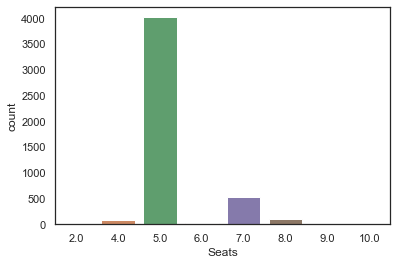

In [185]:
sns.countplot(x='Seats', data=X_train)

As we have mode, which have much more observations then other possibilities, we replace NA in Seats variable with mode value. Also, it goes in line with our intuition, that most of the cars will have 5 seats

In [186]:
X_train['Seats'].fillna(5, inplace = True)
#Do we have any NA in Seats variable?
X_train['Seats'].isnull().values.any()

False

Milleage distribution

(array([  20.,  242.,  668., 1057., 1191.,  740.,  571.,  230.,   30.,
          10.]),
 array([ 6.4  ,  9.114, 11.828, 14.542, 17.256, 19.97 , 22.684, 25.398,
        28.112, 30.826, 33.54 ]),
 <a list of 10 Patch objects>)

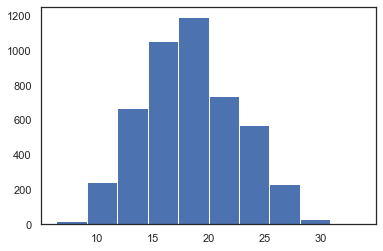

In [187]:
pylab.hist(X_train['Mileage'][~np.isnan(X_train['Mileage'])])

We believe that, from the all varaibles available, Name of the car is the best estimation for prediction of Mileage variable.
We will be using mean of it, but name varaible contains too specific information. Therefore, we divided Name to Brand, Brand2 and Brand3. The most specific information will be included into Brand3, the most general(just brand name) in Brand. Therefre, we will start from Brand3 and then, if still will be missing values, go to Brand2 and Brand.

In [188]:
X_train['Brand'] = X_train['Name'].str.split(' ').str[0]
print(X_train.Brand.unique())
# Brand Isuzu is present as ISUZU and Isuzu, therefore, we change it
X_train.Brand[X_train.Brand == 'ISUZU'] ='Isuzu'
X_train.head()
X_train['Brand2'] = X_train['Name'].str.split(' ').str[1]
X_train.head()
X_train['Brand3'] = X_train['Name'].str.split(' ').str[2]
X_train.head()

['Hyundai' 'Mahindra' 'Tata' 'Maruti' 'Toyota' 'Ford' 'Skoda' 'Volkswagen'
 'Mercedes-Benz' 'Chevrolet' 'BMW' 'Audi' 'Honda' 'Renault' 'Mini'
 'Porsche' 'Mitsubishi' 'Land' 'Jaguar' 'Nissan' 'Fiat' 'Lamborghini'
 'Datsun' 'Volvo' 'Jeep' 'Force' 'Isuzu' 'ISUZU' 'Smart' 'Ambassador']


C:\Users\clasl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Brand2,Brand3
ID,,,,,,,,,,,,,,,
3509,Hyundai i20 Asta Option 1.4 CRDi,Coimbatore,2017,24153,Diesel,Manual,Second,22.54,1396.0,88.73,5.0,9.18,Hyundai,i20,Asta
3332,Mahindra Quanto C6,Mumbai,2013,35000,Diesel,Manual,First,17.21,1493.0,100.00,7.0,3.49,Mahindra,Quanto,C6
5383,Tata Indigo LX BSII,Hyderabad,2005,92000,Diesel,Manual,Second,16.10,1405.0,70.00,5.0,1.10,Tata,Indigo,LX
1891,Maruti Swift Ldi BSIV,Delhi,2014,62000,Diesel,Manual,First,17.80,1248.0,75.00,5.0,3.75,Maruti,Swift,Ldi
5757,Toyota Innova Crysta 2.4 VX MT,Kolkata,2017,31000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,16.95,Toyota,Innova,Crysta


In [189]:
X_train[X_train['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Brand2,Brand3
ID,,,,,,,,,,,,,,,
1259,Land Rover Freelander 2 TD4 S,Bangalore,2010,125000,Diesel,Automatic,Second,NaN,2179.0,115.00,5.0,11.00,Land,Rover,Freelander
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,NaN,2179.0,115.00,5.0,26.00,Land,Rover,Freelander
4302,Hyundai Santro Xing GL,Delhi,2012,61449,Petrol,Manual,First,NaN,1086.0,62.00,5.0,2.15,Hyundai,Santro,Xing
1419,Hyundai Santro Xing XL,Chennai,2007,82000,Petrol,Manual,Second,NaN,1086.0,NaN,5.0,1.35,Hyundai,Santro,Xing
5529,Hyundai Santro LP - Euro II,Chennai,2005,105000,Petrol,Manual,First,NaN,999.0,NaN,5.0,1.75,Hyundai,Santro,LP
996,Hyundai Santro Xing GL,Pune,2008,93000,Petrol,Manual,First,NaN,1086.0,62.00,5.0,1.45,Hyundai,Santro,Xing
4234,Mercedes-Benz M-Class ML 350 4Matic,Chennai,2012,63000,Diesel,Automatic,First,NaN,2987.0,165.00,5.0,26.00,Mercedes-Benz,M-Class,ML
3522,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,NaN,NaN,NaN,5.0,2.66,Hyundai,Santro,GLS
6011,Skoda Superb 3.6 V6 FSI,Hyderabad,2009,53000,Petrol,Automatic,First,NaN,3597.0,262.60,5.0,4.75,Skoda,Superb,3.6


Here, we have a formula which can be used on different variables for imputing mean

In [190]:
by_brand3 = X_train.groupby(['Brand','Brand2','Brand3'])
by_brand2 = X_train.groupby(['Brand','Brand2'])
by_brand1 = X_train.groupby(['Brand'])
def impute_mean(series):
    return series.fillna(series.mean())
X_train.Mileage = by_brand3.Mileage.transform(impute_mean)
X_train[X_train['Mileage'].isnull()]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Brand2,Brand3
ID,,,,,,,,,,,,,,,
5529,Hyundai Santro LP - Euro II,Chennai,2005,105000,Petrol,Manual,First,NaN,999.0,NaN,5.0,1.75,Hyundai,Santro,LP
3522,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,NaN,NaN,NaN,5.0,2.66,Hyundai,Santro,GLS
6011,Skoda Superb 3.6 V6 FSI,Hyderabad,2009,53000,Petrol,Automatic,First,NaN,3597.0,262.6,5.0,4.75,Skoda,Superb,3.6
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,NaN,NaN,NaN,5.0,3.15,Hyundai,Santro,GLS
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,NaN,1950.0,194.0,5.0,35.67,Mercedes-Benz,C-Class,Progressive
1271,Hyundai Santro GLS I - Euro II,Jaipur,2009,89000,Petrol,Manual,Second,NaN,999.0,NaN,5.0,1.60,Hyundai,Santro,GLS
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,NaN,999.0,NaN,5.0,2.30,Hyundai,Santro,AT
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,NaN,2446.0,NaN,8.0,2.20,Toyota,Qualis,Fleet
4629,Fiat Siena 1.2 ELX,Jaipur,2001,70000,Petrol,Manual,Third,NaN,1242.0,NaN,5.0,0.55,Fiat,Siena,1.2


One can see that using just Brand3 is not enough, therefore we use Brand2 on observations, which are left

In [191]:
X_train.Mileage = by_brand2.Mileage.transform(impute_mean)
X_train[X_train['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Brand2,Brand3
ID,,,,,,,,,,,,,,,
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,NaN,1950.0,194.0,5.0,35.67,Mercedes-Benz,C-Class,Progressive
4629,Fiat Siena 1.2 ELX,Jaipur,2001,70000,Petrol,Manual,Third,NaN,1242.0,NaN,5.0,0.55,Fiat,Siena,1.2
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,NaN,2498.0,NaN,6.0,6.99,Mahindra,Jeep,MM
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,3.00,Smart,Fortwo,CDI
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75,Toyota,Prius,2009-2016
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,NaN,1950.0,194.0,5.0,35.00,Mercedes-Benz,C-Class,Progressive


It is still not enough, therefore we used Brand

In [192]:
X_train.Mileage = by_brand1.Mileage.transform(impute_mean)
X_train[X_train['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Brand2,Brand3
ID,,,,,,,,,,,,,,,
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,3.0,Smart,Fortwo,CDI


One line is still left, therefore for it we will create special formula. We will impute mean based on Price

In [193]:
specialcase = X_train.groupby(['Price'])
X_train.Mileage = specialcase.Mileage.transform(impute_mean)
X_train[X_train['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Brand2,Brand3
ID,,,,,,,,,,,,,,,


There are no more NA in Milleage column. Now, we will do the same for other columns

In [194]:
X_train.Engine = by_brand3.Engine.transform(impute_mean)
X_train[X_train['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Brand2,Brand3
ID,,,,,,,,,,,,,,,
5185,Maruti Swift 1.3 LXI,Delhi,2012,52000,Petrol,Manual,First,16.1,NaN,NaN,5.0,3.65,Maruti,Swift,1.3
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.1,NaN,NaN,5.0,4.70,Maruti,Swift,1.3
4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.7,NaN,NaN,5.0,3.93,Fiat,Punto,1.2
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1,NaN,NaN,5.0,3.15,Maruti,Swift,1.3
2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,NaN,NaN,5.0,4.24,Maruti,Swift,1.3
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,5.0,2.11,Maruti,Swift,1.3
5015,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.1,NaN,NaN,5.0,1.60,Maruti,Swift,1.3
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,NaN,NaN,5.0,2.35,Maruti,Swift,1.3
4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.3,NaN,NaN,5.0,2.60,Fiat,Punto,1.3


In [195]:
X_train.Engine = by_brand2.Engine.transform(impute_mean)
X_train[X_train['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Brand2,Brand3
ID,,,,,,,,,,,,,,,


In [196]:
X_train.Power = by_brand3.Power.transform(impute_mean)
X_train[X_train['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Brand2,Brand3
ID,,,,,,,,,,,,,,,
2450,Tata Indica DLS,Kolkata,2009,75648,Diesel,Manual,First,13.500000,1405.000000,NaN,5.0,0.82,Tata,Indica,DLS
5185,Maruti Swift 1.3 LXI,Delhi,2012,52000,Petrol,Manual,First,16.100000,1240.802198,NaN,5.0,3.65,Maruti,Swift,1.3
5529,Hyundai Santro LP - Euro II,Chennai,2005,105000,Petrol,Manual,First,17.123040,999.000000,NaN,5.0,1.75,Hyundai,Santro,LP
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.100000,1240.802198,NaN,5.0,4.70,Maruti,Swift,1.3
4351,Maruti Esteem LX BSII,Jaipur,2003,55000,Petrol,Manual,Third,15.900000,1298.000000,NaN,5.0,0.70,Maruti,Esteem,LX
3522,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,17.123040,1028.000000,NaN,5.0,2.66,Hyundai,Santro,GLS
648,Tata Indica DLS,Jaipur,2009,82000,Diesel,Manual,Second,13.500000,1405.000000,NaN,5.0,0.75,Tata,Indica,DLS
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,17.123040,1028.000000,NaN,5.0,3.15,Hyundai,Santro,GLS
1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.000000,2148.000000,NaN,5.0,5.00,Mercedes-Benz,E-Class,220


In [197]:
X_train.Power = by_brand2.Power.transform(impute_mean)
X_train[X_train['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Brand2,Brand3
ID,,,,,,,,,,,,,,,
4629,Fiat Siena 1.2 ELX,Jaipur,2001,70000,Petrol,Manual,Third,17.960000,1242.0,NaN,5.0,0.55,Fiat,Siena,1.2
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,15.155872,2498.0,NaN,6.0,6.99,Mahindra,Jeep,MM
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.500000,1061.0,NaN,5.0,1.75,Maruti,Estilo,LXI
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.000000,3436.0,NaN,2.0,40.00,Porsche,Cayman,2009-2012
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.500000,1061.0,NaN,5.0,2.50,Maruti,Estilo,LXI
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,19.814107,799.0,NaN,2.0,3.00,Smart,Fortwo,CDI
2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.000000,3436.0,NaN,2.0,43.00,Porsche,Cayman,2009-2012
4709,Maruti 1000 AC,Hyderabad,1998,104000,Petrol,Manual,Second,15.000000,970.0,NaN,5.0,0.85,Maruti,1000,AC


In [198]:
X_train.Power = by_brand1.Power.transform(impute_mean)
X_train[X_train['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Brand2,Brand3
ID,,,,,,,,,,,,,,,
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,19.814107,799.0,NaN,2.0,3.0,Smart,Fortwo,CDI


In [199]:
X_train.Power = specialcase.Power.transform(impute_mean)
X_train[X_train['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Brand2,Brand3
ID,,,,,,,,,,,,,,,


In [200]:
print(X_train.isnull().sum())

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Brand2               0
Brand3               0
dtype: int64


There is no more missing values in our dataset

## Analysing Data

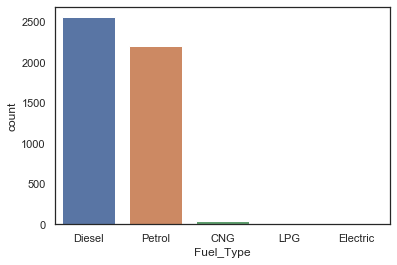

In [201]:
graphF = sns.countplot(x='Fuel_Type', data=X_train)

One can see that most of the cars use diesel or petrol and only some other types. We have not equal distribution

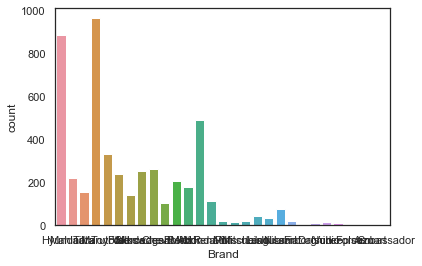

In [202]:
graphB2 = sns.countplot(x='Brand', data=X_train)

Distribution of brands is also not equal and skewed

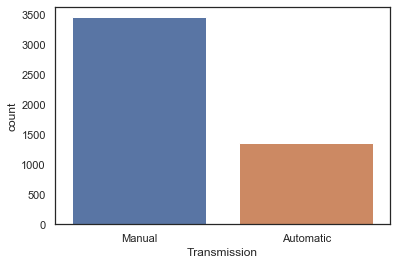

In [203]:
graphT = sns.countplot(x='Transmission', data=X_train)

Most of the cars have manual type of transmission

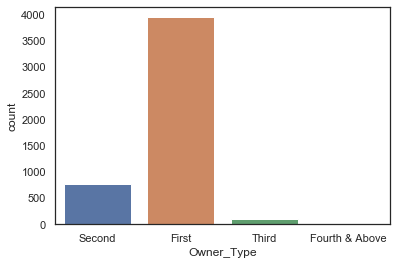

In [204]:
graphO = sns.countplot(x='Owner_Type', data=X_train)

Most of the cars were in use by only one person

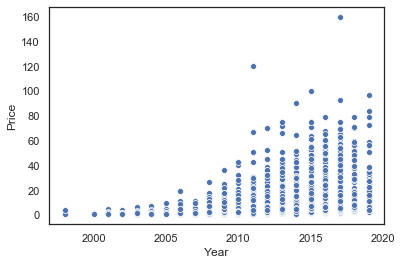

In [205]:
plotY = sns.scatterplot(x="Year", y="Price", data=X_train)

One can see clear dependence between year and price and it goes in line with our intuition (newer cars are more expensive)

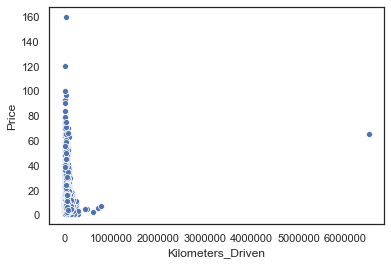

In [206]:
plotK = sns.scatterplot(x="Kilometers_Driven", y="Price", data=X_train)

One can see clear outlier which should be deleted

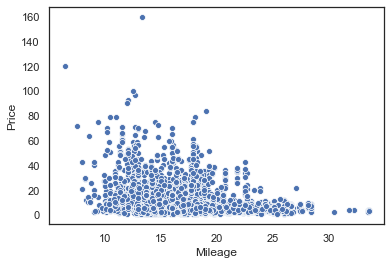

In [207]:
plotM = sns.scatterplot(x="Mileage", y="Price", data=X_train)

One can see that there is no clear connection between variables price and milleage

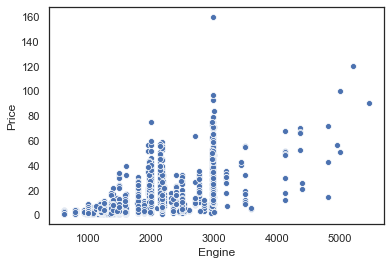

In [208]:
plotE = sns.scatterplot(x="Engine", y="Price", data=X_train)

There is some connection between variables price and engine, but it is not clear if it will be significant before formal tests

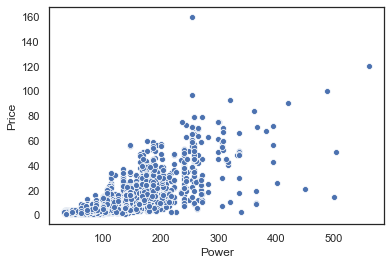

In [209]:
plotP = sns.scatterplot(x="Power", y="Price", data=X_train)

There is some connection between variables price and power, but it is not clear if it will be significant before formal tests. Some outliers are present, so we should get rid of them

In the next step we delete outliers

In [210]:
X_train.drop(X_train[X_train['Price'] > 100].index, axis=0, inplace=True)
X_train.drop(X_train[X_train['Kilometers_Driven'] >= 1000000].index, axis=0, inplace=True)

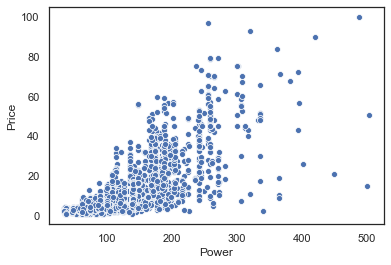

In [211]:
plotP = sns.scatterplot(x="Power", y="Price", data=X_train)

One can assume that outliers are removed

## Variables Selection and Transformation

Let's look on our dependant variable price

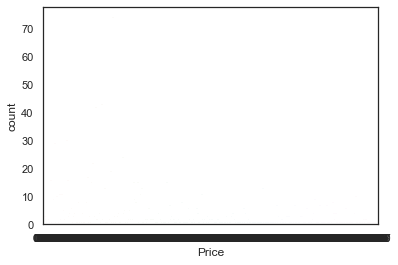

In [212]:
graphprice = sns.countplot(x='Price', data=X_train)

Our dataset looks not symmetric, but we also checked it using formal test

In [213]:
X_train['Price'].skew()

3.0255877459369818

It shows that our dependent variable is not symmetric, therefore we decided to take logarithm

In [214]:
X_train['Price_log']=np.log(df.Price)

In [215]:
X_train['Price_log'].skew()

0.4061838466715072

Now, we can see that it is almost symmetrically distributed

In [216]:
(X_train.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Brand                 object
Brand2                object
Brand3                object
Price_log            float64
dtype: object

Now we will be operating on copy of our dataset, as these changes will be needed only for variable selection process

In [217]:
X_train_copy = X_train.copy()

In [218]:
print(X_train_copy.Brand.unique())

['Hyundai' 'Mahindra' 'Tata' 'Maruti' 'Toyota' 'Ford' 'Skoda' 'Volkswagen'
 'Mercedes-Benz' 'Chevrolet' 'BMW' 'Audi' 'Honda' 'Renault' 'Mini'
 'Porsche' 'Mitsubishi' 'Land' 'Jaguar' 'Nissan' 'Fiat' 'Datsun' 'Volvo'
 'Jeep' 'Force' 'Isuzu' 'Smart' 'Ambassador']


In [219]:
print(X_train.Name.unique())
print(X_train.Location.unique())
print(X_train.Fuel_Type.unique())
print(X_train.Transmission.unique())
print(X_train.Owner_Type.unique())
print(X_train.Brand.unique())

['Hyundai i20 Asta Option 1.4 CRDi' 'Mahindra Quanto C6'
 'Tata Indigo LX BSII' ... 'Maruti Swift Dzire LDi' 'Tata Xenon XT EX 4X4'
 'Mahindra Scorpio 1.99 S4 Plus']
['Coimbatore' 'Mumbai' 'Hyderabad' 'Delhi' 'Kolkata' 'Kochi' 'Pune'
 'Chennai' 'Bangalore' 'Jaipur' 'Ahmedabad']
['Diesel' 'Petrol' 'CNG' 'LPG' 'Electric']
['Manual' 'Automatic']
['Second' 'First' 'Third' 'Fourth & Above']
['Hyundai' 'Mahindra' 'Tata' 'Maruti' 'Toyota' 'Ford' 'Skoda' 'Volkswagen'
 'Mercedes-Benz' 'Chevrolet' 'BMW' 'Audi' 'Honda' 'Renault' 'Mini'
 'Porsche' 'Mitsubishi' 'Land' 'Jaguar' 'Nissan' 'Fiat' 'Datsun' 'Volvo'
 'Jeep' 'Force' 'Isuzu' 'Smart' 'Ambassador']


We created dictionaries for our independent variables, which have levels

In [220]:
TrDict = {'Manual':0, "Automatic":1}
X_train_copy["Transmission"]=X_train_copy.Transmission.map(TrDict)
X_train_copy["Transmission"]=X_train_copy["Transmission"].astype(int)
LoDict = {'Coimbatore':0, "Jaipur":1, "Mumbai":2, "Kolkata":3, "Hyderabad":4, "Pune":5, "Delhi":6, "Chennai":7, "Bangalore":8,
         "Kochi": 9, "Ahmedabad":10}
X_train_copy["Location"]=X_train_copy.Location.map(LoDict)
X_train_copy["Location"]=X_train_copy["Location"].astype(int)
OwDict = {'First':0, "Second":1, "Third":2, 'Fourth & Above':3}
X_train_copy["Owner_Type"]=X_train_copy.Owner_Type.map(OwDict)
X_train_copy["Owner_Type"]=X_train_copy["Owner_Type"].astype(int)
FuDict = {'Petrol':0, "Diesel":1, "LPG":2, "CNG":3, "Electric":4}
X_train_copy["Fuel_Type"]=X_train_copy.Fuel_Type.map(FuDict)
X_train_copy["Fuel_Type"]=X_train_copy["Fuel_Type"].astype(int)
BrDict = {'Tata':0, "Hyundai":1, "Maruti":2, "Skoda":3, "Nissan":4, "Honda":5,
          "Land":6, "BMW":7, "Ford":8, "Volkswagen":9, "Audi":10, "Mercedes-Benz":11, "Mahindra":12, "Toyota":13,
         "Chevrolet":14, "Renault":15, "Jaguar":16, "Porsche":17, "Mini":18, "Volvo":19, "Fiat":20, "Jeep":21, "Force":22,
         "Mitsubishi":23, "Datsun":24, "Isuzu":25, "Smart":26, "Ambassador":27, "Bentley":28}
X_train_copy["Brand"]=X_train_copy.Brand.map(BrDict)
X_train_copy["Brand"]=X_train_copy["Brand"].astype(int)

In [221]:
X_train_copy.dtypes

Name                  object
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Brand                  int32
Brand2                object
Brand3                object
Price_log            float64
dtype: object

We used Pearson Correlation for selecting variables
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

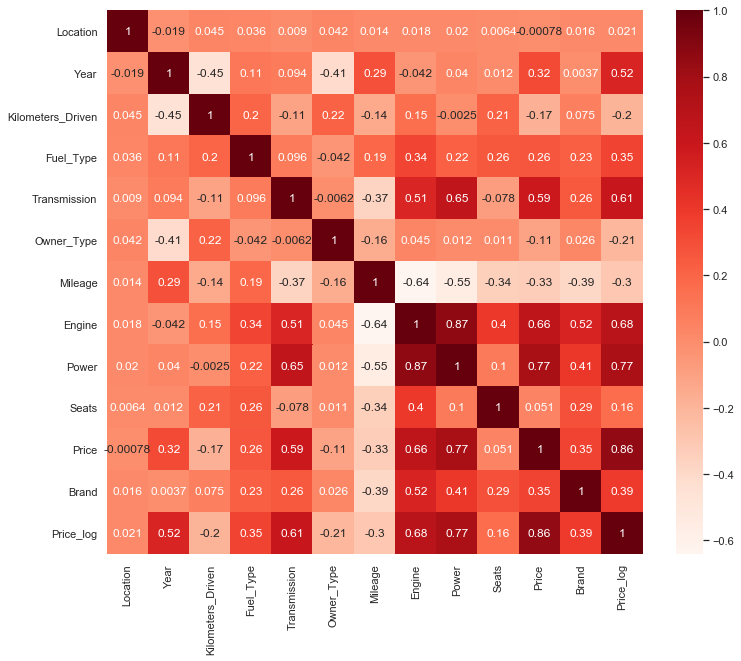

In [222]:
sns.set(style="white")

plt.figure(figsize=(12,10))
corr = X_train_copy.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

To see all correlations in more details, we will use built-in functions and level 0.5, as it looks sensible in our case

In [223]:
#Correlation with y variable
y_corr = abs(corr["Price_log"])
#Selecting highly correlated features
features = y_corr[y_corr>=0.35]
features

Year            0.515176
Transmission    0.613594
Engine          0.684915
Power           0.766890
Price           0.856055
Brand           0.387337
Price_log       1.000000
Name: Price_log, dtype: float64

As Transmission, Engine and Power seems to be dependent between each other we would like to check correlation among them

In [224]:
print(X_train_copy[["Transmission","Engine"]].corr())
print(X_train_copy[["Transmission","Power"]].corr())
print(X_train_copy[["Engine","Power"]].corr()) #correlated the most
#we can as well drop Engine variable - it has high correlation with Transmission and Power and lower correlation with Price_log
#than Power

              Transmission    Engine
Transmission      1.000000  0.508442
Engine            0.508442  1.000000
              Transmission     Power
Transmission      1.000000  0.653029
Power             0.653029  1.000000
          Engine     Power
Engine  1.000000  0.865634
Power   0.865634  1.000000


We will as well drop Engine variable - it has high correlation with Transmission and Power and lower correlation with Price_log
 than Power

Therefore, we chosed such variables: Year, Transmission, Power
<br>One can also use Fuel_Type and Brand if use correlation limit 0.35
<br> We would like to have all of them in our final dataset, as it can have sense in future investigations

In [225]:
X_train_f = X_train[["Year", "Transmission", "Power","Brand","Fuel_Type","Price_log"]].copy()
X_train_f.head()
print(X_train_f.shape[0])

4812


In [226]:
X_train_f.dtypes

Year              int64
Transmission     object
Power           float64
Brand            object
Fuel_Type        object
Price_log       float64
dtype: object

## Training/test data division, cross-validation

## Linear Regression

We will change Fuel_type and Brand variables into categorical ones

In [227]:
X_train_f['Fuel_Type'] = pd.Categorical(X_train_f['Fuel_Type'])
X_train_f['Brand'] = pd.Categorical(X_train_f['Brand'])

We divide train dataset into test(validation) and train for validation purposes. We estimated Price_log based on Transmission, Power and Year. As our dependant variable is continuous, we used Mean Squared Error as balidation criteria

In [228]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_f, X_train_f.Price_log, test_size=0.3, random_state=random.randint(0,10000))
print(X_train2.shape, X_test2.shape)
mod = sm.GLM.from_formula(formula="Price_log ~ Transmission+Power+Year", data=X_train2, family=sm.families.Gaussian())
res = mod.fit()
print(res.summary())
preds = res.predict(X_test2)
mse = metrics.mean_squared_error(y_test2, preds)
r = metrics.r2_score(y_test2, preds)
print("MSE:")
print(mse)
print("\nR_squared:")
print(r)

(3368, 6) (1444, 6)
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Price_log   No. Observations:                 3368
Model:                            GLM   Df Residuals:                     3364
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                         0.12980
Method:                          IRLS   Log-Likelihood:                -1338.7
Date:                Tue, 02 Jun 2020   Deviance:                       436.65
Time:                        22:15:05   Pearson chi2:                     437.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

We get quite small MSE which is good in our case
<br> Let's also check how it will work for all variables (corr>=0.35)

In [229]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_f, X_train_f.Price_log, test_size=0.3, random_state=random.randint(0,10000))
print(X_train2.shape, X_test2.shape)
mod = sm.GLM.from_formula(formula="Price_log ~ Transmission+Power+Year+Fuel_Type+Brand", data=X_train2, family=sm.families.Gaussian())
res = mod.fit()
print(res.summary())
preds = res.predict(X_test2)
mse = metrics.mean_squared_error(y_test2, preds)
r = metrics.r2_score(y_test2, preds)
print("MSE:")
print(mse)
print("\nR_squared:")
print(r)

(3368, 6) (1444, 6)
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Price_log   No. Observations:                 3368
Model:                            GLM   Df Residuals:                     3334
Model Family:                Gaussian   Df Model:                           33
Link Function:               identity   Scale:                        0.073940
Method:                          IRLS   Log-Likelihood:                -375.92
Date:                Tue, 02 Jun 2020   Deviance:                       246.52
Time:                        22:15:06   Pearson chi2:                     247.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

Value of MSE is even smaller, but we still need to check for overfitting
<br> We checked both models by cross validation

In [230]:
import random 
from sklearn.model_selection import KFold
for z in range(10):
    trainRes = []
    valRes = []
    kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
    for train, test in kf.split(X_train2.index.values):
        mod = sm.GLM.from_formula(formula="Price_log ~ Transmission + Power +Year", data=X_train_f.iloc[train], family=sm.families.Gaussian())
        res = mod.fit()
        predsTrain = res.predict()
        preds = res.predict(X_train_f.iloc[test])
        trainRes.append(metrics.mean_squared_error(X_train_f.iloc[train].Price_log, predsTrain))
        valRes.append(metrics.mean_squared_error(X_train_f.iloc[test].Price_log, preds))
    print("Train MSE:", np.mean(trainRes), "Valid MSE:", np.mean(valRes))

Train MSE: 0.12757916065299005 Valid MSE: 0.1284498756586933
Train MSE: 0.12756406214478228 Valid MSE: 0.12858967906128496
Train MSE: 0.12760311158776202 Valid MSE: 0.12823612387036246
Train MSE: 0.12755763160788147 Valid MSE: 0.12864371323804116
Train MSE: 0.12758101054172472 Valid MSE: 0.12843377011218152
Train MSE: 0.12758215745385332 Valid MSE: 0.12844361953336286
Train MSE: 0.12757051950650486 Valid MSE: 0.12853484702134493
Train MSE: 0.12751067757514087 Valid MSE: 0.12908774583488383
Train MSE: 0.12755832815084395 Valid MSE: 0.12863952889410307
Train MSE: 0.12759330857240822 Valid MSE: 0.12833389739424775


Values are more or less stable, so here we have no problem

In [231]:
import random 
from sklearn.model_selection import KFold
for z in range(10):
    trainRes = []
    valRes = []
    kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
    for train, test in kf.split(X_train2.index.values):
        mod = sm.GLM.from_formula(formula="Price_log ~ Transmission + Power +Year+Fuel_Type+Brand", data=X_train_f.iloc[train], family=sm.families.Gaussian())
        res = mod.fit()
        predsTrain = res.predict()
        preds = res.predict(X_train_f.iloc[test])
        trainRes.append(metrics.mean_squared_error(X_train_f.iloc[train].Price_log, predsTrain))
        valRes.append(metrics.mean_squared_error(X_train_f.iloc[test].Price_log, preds))
    print("Train MSE:", np.mean(trainRes), "Valid MSE:", np.mean(valRes))

Train MSE: 0.07290300435972752 Valid MSE: 0.10279026707592225
Train MSE: 0.07283186098098834 Valid MSE: 0.15539012624676257
Train MSE: 0.07289959937596584 Valid MSE: 0.10279238701587987
Train MSE: 0.07299277690230113 Valid MSE: 0.10222386101854211
Train MSE: 0.07294920783992265 Valid MSE: 0.10238741199253465
Train MSE: 0.07289507498995748 Valid MSE: 0.1028595973512414
Train MSE: 0.07274372972695753 Valid MSE: 0.1907931795506018
Train MSE: 0.07302329188765086 Valid MSE: 0.16272616015488744
Train MSE: 0.07298304789316366 Valid MSE: 0.10228640931180547
Train MSE: 0.07279062127043417 Valid MSE: 0.10375708931747567


Values are very different, so we cannot use this model

## kNN

For kNN we need to do some data preparation

In [232]:
X_train_k = X_train_f[["Year", "Power","Transmission"]].copy()
print(X_train_k.head())
print(X_train_k.dtypes)
print(X_train_k.shape)
X_train_f.head()

      Year   Power Transmission
ID                             
3509  2017   88.73       Manual
3332  2013  100.00       Manual
5383  2005   70.00       Manual
1891  2014   75.00       Manual
5757  2017  147.80       Manual
Year              int64
Power           float64
Transmission     object
dtype: object
(4812, 3)


,Year,Transmission,Power,Brand,Fuel_Type,Price_log
ID,,,,,,
3509,2017,Manual,88.73,Hyundai,Diesel,2.217027
3332,2013,Manual,100.00,Mahindra,Diesel,1.249902
5383,2005,Manual,70.00,Tata,Diesel,0.095310
1891,2014,Manual,75.00,Maruti,Diesel,1.321756
5757,2017,Manual,147.80,Toyota,Diesel,2.830268


In [233]:
dummLev = pd.get_dummies(X_train_f["Transmission"])
dummLev.shape
X_train2 = pd.concat([X_train_k.loc[:, X_train_k.columns != 'Transmission'], dummLev], axis=1)
print(X_train_k.shape, math.sqrt(X_train_k.shape[0]))
X_train2.head()

(4812, 3) 69.3685807840985


,Year,Power,Automatic,Manual
ID,,,,
3509,2017,88.73,0,1
3332,2013,100.00,0,1
5383,2005,70.00,0,1
1891,2014,75.00,0,1
5757,2017,147.80,0,1


We also need to do standarization

In [234]:
X_train2[["Year", "Power"]] = X_train2[["Year", "Power"]].apply(lambda x: (x-x.mean())/x.std())
features = X_train2.columns.tolist()

In [235]:
X_train2
X_train2.iloc[test][features]

,Year,Power,Automatic,Manual
ID,,,,
4164,1.104996,0.174741,0,1
5197,0.496512,-0.857673,1,0
3479,-1.024700,0.911908,0,1
4769,1.104996,-1.368165,0,1
3861,-1.633184,0.220457,0,1
...,...,...,...,...
1880,-0.416215,-0.840529,0,1
1628,-2.850153,-1.431024,0,1
2326,0.496512,0.719902,1,0


Square of 673 is about 25, so we will use 25

In [236]:
kf = KFold(n_splits=5, shuffle=True, random_state=2018)
probs = []
indicies = []
mse = []
r=[]

n_neighbors = 25
clf = neighbors.KNeighborsRegressor(n_neighbors, n_jobs=-1, p=2) #p=2 means Euclidean metrics
for train, test in kf.split(X_train2.index.values):
    clf.fit(X_train2.iloc[train][features].values, X_train_f.iloc[train]["Price_log"].values)
    prob = clf.predict(X_train2.iloc[test][features].values)
    probs.append(prob)
    indicies.append(test)
    mse.append(metrics.mean_squared_error(X_train_f.iloc[test]["Price_log"].values, prob))
    r.append(metrics.r2_score(X_train_f.iloc[test]["Price_log"].values, prob)) 
print("MSE:")
print(np.mean(mse))
print(mse)
print("\nR_squared:")
print(np.mean(r))
print(r)

MSE:
0.1007171235197765
[0.09273168946386275, 0.10477214524931174, 0.09160631982743386, 0.10476296344670001, 0.10971249961157416]

R_squared:
0.8664663862072419
[0.8786857079752665, 0.8622284346216833, 0.8825862757616265, 0.8664687179029944, 0.8423627947746393]


Also, we tried n_neighbors =50

In [237]:
kf = KFold(n_splits=5, shuffle=True, random_state=2018)
probs = []
indicies = []
mse = []
r=[]

n_neighbors = 50
clf = neighbors.KNeighborsRegressor(n_neighbors, n_jobs=-1, p=2)
for train, test in kf.split(X_train2.index.values):
    clf.fit(X_train2.iloc[train][features].values, X_train_f.iloc[train]["Price_log"].values)
    prob = clf.predict(X_train2.iloc[test][features].values)
    probs.append(prob)
    indicies.append(test)
    mse.append(metrics.mean_squared_error(X_train_f.iloc[test]["Price_log"].values, prob)) 
    r.append(metrics.r2_score(X_train_f.iloc[test]["Price_log"].values, prob)) 
print("MSE:")
print(np.mean(mse))
print(mse)
print("\nR_squared:")
print(np.mean(r))
print(r)

MSE:
0.1069828207847455
[0.09982755615754128, 0.10968818439624384, 0.09690989012821222, 0.113210916690616, 0.11527755655111413]

R_squared:
0.8582046037599147
[0.8694026888776691, 0.8557640217080957, 0.8757885794678831, 0.8557009237260992, 0.8343668050198262]


For now 25 seems to be the best value
<br> We also tried to change our distance metric from Euclidesian to Manhatan .

In [238]:
kf = KFold(n_splits=5, shuffle=True, random_state=2018)
probs = []
indicies = []
mse = []
r=[]

n_neighbors = 25 
clf = neighbors.KNeighborsRegressor(n_neighbors, n_jobs=-1, p=1) #p=1 means Manhatan metrics
for train, test in kf.split(X_train2.index.values):
    clf.fit(X_train2.iloc[train][features].values, X_train_f.iloc[train]["Price_log"].values)
    prob = clf.predict(X_train2.iloc[test][features].values)
    probs.append(prob)
    indicies.append(test)
    mse.append(metrics.mean_squared_error(X_train_f.iloc[test]["Price_log"].values, prob))  
    r.append(metrics.r2_score(X_train_f.iloc[test]["Price_log"].values, prob)) 
print("MSE:")
print(np.mean(mse))
print(mse)
print("\nR_squared:")
print(np.mean(r))
print(r)

MSE:
0.1004278068984125
[0.09387832418601454, 0.10391610765212066, 0.09025277473552533, 0.1048334485134056, 0.10925837940499644]

R_squared:
0.8668510088432976
[0.8771856470971237, 0.8633540929682512, 0.8843211426405158, 0.8663788773618696, 0.8430152841487281]


One can see that results are almost the same

## SVR

LINEAR

In [239]:
from sklearn.svm import SVR
#data have been previously normalized
features = X_train2.columns.tolist()
X_train2.iloc[test][features]
kf = KFold(n_splits=5)
mses = []
r=[]
clf = SVR(C=1, cache_size=500, kernel='linear',
    max_iter=-1, tol=0.001, verbose=False)

for train, test in kf.split(X_train2.index.values):
    
    clf.fit(X_train2.iloc[train][features].values, X_train_f.iloc[train]["Price_log"].values)
    prob = clf.predict(X_train2.iloc[test][features].values)
    mses.append(metrics.mean_squared_error(X_train_f.iloc[test]["Price_log"].values, prob))
    r.append(metrics.r2_score(X_train_f.iloc[test]["Price_log"].values, prob))

print("MSE:")
print(np.mean(mses))
print(mses)
print("\nR_squared:")
print(np.mean(r))
print(r)

MSE:
0.12948012299206738
[0.15874197860758177, 0.11977196275956149, 0.11974562704065317, 0.12674426973800326, 0.12239677681453726]

R_squared:
0.8284736793502641
[0.7797701635591572, 0.838381445566693, 0.8500766896431577, 0.8339830355795458, 0.8401570624027663]


POLYNOMINAL

In [240]:
features = X_train2.columns.tolist()
X_train2.iloc[test][features]
kf = KFold(n_splits=5)
mses = []
r=[]
clf = SVR(C=1, cache_size=500, degree=2,kernel='poly',
    max_iter=-1, tol=0.001, verbose=False)

for train, test in kf.split(X_train2.index.values):
    
    clf.fit(X_train2.iloc[train][features].values, X_train_f.iloc[train]["Price_log"].values)
    prob = clf.predict(X_train2.iloc[test][features].values)
    mses.append(metrics.mean_squared_error(X_train_f.iloc[test]["Price_log"].values, prob))
    r.append(metrics.r2_score(X_train_f.iloc[test]["Price_log"].values, prob))

print("MSE:")
print(np.mean(mses))
print(mses)
print("\nR_squared:")
print(np.mean(r))
print(r)

MSE:
0.10769943339359962
[0.11920064214864541, 0.09910466250460317, 0.099796650983007, 0.11543015550171343, 0.1049650558300291]

R_squared:
0.8575350210376651
[0.8346276255700784, 0.8662696016450139, 0.8750531050890122, 0.8488029158352595, 0.8629218570489615]


RBF

In [241]:
features = X_train2.columns.tolist()
X_train2.iloc[test][features]
kf = KFold(n_splits=5)
mses = []
r=[]
clf = SVR(C=1, cache_size=500, degree=3,kernel='rbf',
    max_iter=-1, tol=0.001, verbose=False)

for train, test in kf.split(X_train2.index.values):
    
    clf.fit(X_train2.iloc[train][features].values, X_train_f.iloc[train]["Price_log"].values)
    prob = clf.predict(X_train2.iloc[test][features].values)
    mses.append(metrics.mean_squared_error(X_train_f.iloc[test]["Price_log"].values, prob))
    r.append(metrics.r2_score(X_train_f.iloc[test]["Price_log"].values, prob))

print("MSE:")
print(np.mean(mses))
print(mses)
print("\nR_squared:")
print(np.mean(r))
print(r)

MSE:
0.10472341869806204
[0.11038363397901829, 0.09866005222685807, 0.09694393518208066, 0.11520769738031583, 0.10242177472203728]

R_squared:
0.8615383381404491
[0.8468598547770401, 0.866869552323952, 0.8786247478032547, 0.8490943043303879, 0.8662432314676111]


RBF seems to be the best
<br>Let's check how C affects the output?

In [242]:
for c in [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10]:
    print("\n")
    print(c)
    features = X_train2.columns.tolist()
    X_train2.iloc[test][features]
    kf = KFold(n_splits=5)
    mses = []
    r=[]
    clf = SVR(C=c, cache_size=500, degree=3,kernel='rbf',
        max_iter=-1, tol=0.001, verbose=False)

    for train, test in kf.split(X_train2.index.values):
    
        clf.fit(X_train2.iloc[train][features].values, X_train_f.iloc[train]["Price_log"].values)
        prob = clf.predict(X_train2.iloc[test][features].values)
        mses.append(metrics.mean_squared_error(X_train_f.iloc[test]["Price_log"].values, prob))
        r.append(metrics.r2_score(X_train_f.iloc[test]["Price_log"].values, prob))

    print("MSE:")
    print(np.mean(mses))
    print(mses)
    print("\nR_squared:")
    print(np.mean(r))
    print(r)



0.01
MSE:
0.15851751462813393
[0.1347803898822384, 0.14448399947808205, 0.1787616287388239, 0.17998879247486532, 0.15457276256665994]

R_squared:
0.7913227436597702
[0.8130131457377419, 0.8050353805984853, 0.7761877756403862, 0.7642402846444378, 0.7981371316778]


0.1
MSE:
0.1103031151305498
[0.10891523412927116, 0.1039489419803892, 0.10983082184782647, 0.12194209410214775, 0.10687848359311447]

R_squared:
0.8543632484711823
[0.8488970314682731, 0.8597328009772385, 0.862490173565599, 0.8402732025695533, 0.8604230337752482]


0.25
MSE:
0.1061600723792058
[0.10757932247900259, 0.10106363969484147, 0.10177856527935045, 0.11668548477038727, 0.10369334967244719]

R_squared:
0.8597379098703568
[0.8507504013633616, 0.8636261861547817, 0.8725717188413918, 0.8471586130595665, 0.8645826299326822]


0.5
MSE:
0.10491015162613415
[0.10895614234945612, 0.0994544492858046, 0.09846454202204846, 0.115108020686306, 0.10256760378705555]

R_squared:
0.8613272922856311
[0.8488402776674231, 0.865797604420

C (regularization parameter) equals to 2 gives the best result in this case and it is almost equal to what we have previously for C=1

## Usage of Chosen Method on test data

Best result from Linear Regression: 0.12394991924957734
<br> Best result from kNN: 0.1004278068984125
<br> Best result from SVM: 0.10424545120025556
Therefore, we would like to use kNN

Let's prepare data for x_test

In [243]:
X_test = X_test.rename(columns = {'Unnamed: 0': 'ID'})
X_test.set_index('ID', inplace = True)

X_test['Mileage']=X_test['Mileage'].str.replace('km/kg','')
X_test['Mileage']=X_test['Mileage'].str.replace('kmpl','')
X_test['Engine']=X_test['Engine'].str.replace('CC','')
#Power variable: we have as well null bhp
X_test['Power'] = X_test['Power'].str.split(' ').str[0]
X_test.Power = X_test.Power.replace('null', np.NaN)
X_test['Mileage']=X_test['Mileage'].astype(float)
X_test['Engine']=X_test['Engine'].astype(float)
X_test['Power']=X_test['Power'].astype(float)

del X_test['New_Price']
X_test.Mileage = X_test.Mileage.replace(0, np.NaN)
X_test.Seats = X_test.Seats.replace(0, np.NaN)

X_test.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [244]:
X_test.Mileage = X_test.Mileage.replace(0, np.NaN)
X_test.Seats = X_test.Seats.replace(0, np.NaN)

X_test['Brand'] = X_test['Name'].str.split(' ').str[0]
print(X_test.Brand.unique())

X_test.head()
X_test['Brand2'] = X_test['Name'].str.split(' ').str[1]
X_test.head()
X_test['Brand3'] = X_test['Name'].str.split(' ').str[2]
X_test.head()
by_brand3 = X_test.groupby(['Brand','Brand2','Brand3'])
by_brand2 = X_test.groupby(['Brand','Brand2'])
by_brand1 = X_test.groupby(['Brand'])

X_test.Mileage = by_brand3.Mileage.transform(impute_mean)
print(X_test[X_test['Mileage'].isnull()])

X_test.Engine = by_brand3.Engine.transform(impute_mean)
print(X_test[X_test['Engine'].isnull()])

X_test.Power = by_brand3.Power.transform(impute_mean)
print(X_test[X_test['Power'].isnull()])

X_test.Mileage = by_brand2.Mileage.transform(impute_mean)
print(X_test[X_test['Mileage'].isnull()])

X_test.Engine = by_brand2.Engine.transform(impute_mean)
print(X_test[X_test['Engine'].isnull()])

X_test.Power = by_brand2.Power.transform(impute_mean)
print(X_test[X_test['Power'].isnull()])

X_test.Mileage = by_brand1.Mileage.transform(impute_mean)
print(X_test[X_test['Mileage'].isnull()])

X_test.Engine = by_brand1.Engine.transform(impute_mean)
print(X_test[X_test['Engine'].isnull()])

X_test.Power = by_brand1.Power.transform(impute_mean)
print(X_test[X_test['Power'].isnull()])

print(X_test.isnull().sum())

['Mahindra' 'Maruti' 'Volkswagen' 'Ford' 'Toyota' 'Honda' 'Hyundai'
 'Skoda' 'Renault' 'Audi' 'Mitsubishi' 'Mercedes-Benz' 'BMW' 'Tata' 'Land'
 'Chevrolet' 'Nissan' 'Datsun' 'Jeep' 'Fiat' 'Volvo' 'Jaguar' 'Porsche'
 'Mini' 'Bentley']
                                          Name    Location  Year  \
ID                                                                 
2842           Hyundai Santro GLS II - Euro II   Bangalore  2012   
443              Hyundai Santro GLS I - Euro I  Coimbatore  2012   
2267                       Toyota Qualis RS E2        Pune  2004   
5943                   Mahindra Jeep MM 540 DP     Chennai  2002   
962   Mercedes-Benz C-Class Progressive C 220d      Mumbai  2018   
4446                      Mahindra E Verito D4     Chennai  2016   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
ID                                                                           
2842              43000    Petrol       Manual      First      Na

In [245]:
X_test.dtypes
print(X_test.isnull().sum())
X_test['Seats'].fillna(5, inplace = True)
print(X_test.isnull().sum())

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                12
Price                 0
Brand                 0
Brand2                0
Brand3                0
dtype: int64
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Brand2               0
Brand3               0
dtype: int64


In [246]:
X_test_k = X_test[["Year", "Power","Transmission"]].copy()
print(X_test_k.head())
print(X_test_k.dtypes)
dummLev = pd.get_dummies(X_test_k["Transmission"])
print(dummLev.shape)
X_test2 = pd.concat([X_test_k.loc[:, X_test_k.columns != 'Transmission'], dummLev], axis=1)
print(X_test_k.shape)
print(X_test2.head())
X_test2[["Year", "Power"]] = X_test2[["Year", "Power"]].apply(lambda x: (x-x.mean())/x.std())
features = X_test2.columns.tolist()
X_test2

      Year   Power Transmission
ID                             
5150  2014  140.00       Manual
2164  2010   74.00       Manual
1136  2012  103.60       Manual
5641  2012  153.86    Automatic
1515  2017  100.60       Manual
Year              int64
Power           float64
Transmission     object
dtype: object
(1204, 2)
(1204, 3)
      Year   Power  Automatic  Manual
ID                                   
5150  2014  140.00          0       1
2164  2010   74.00          0       1
1136  2012  103.60          0       1
5641  2012  153.86          1       0
1515  2017  100.60          0       1


,Year,Power,Automatic,Manual
ID,,,,
5150,0.214035,0.446177,0,1
2164,-1.035409,-0.703140,0,1
1136,-0.410687,-0.187689,0,1
5641,-0.410687,0.687534,1,0
1515,1.151117,-0.239930,0,1
...,...,...,...,...
5899,-0.098326,-0.704881,0,1
4139,1.151117,1.560667,1,0
728,1.151117,-0.450638,0,1


In [247]:
y = y_test.copy()
y

5150     7.25
2164     4.25
1136     3.90
5641     8.41
1515    13.48
        ...  
5899     4.99
4139    38.15
728      8.50
3619     6.25
3828     3.87
Name: Price, Length: 1204, dtype: float64

In [248]:
Y = np.log(y)
Y

5150    1.981001
2164    1.446919
1136    1.360977
5641    2.129421
1515    2.601207
          ...   
5899    1.607436
4139    3.641526
728     2.140066
3619    1.832581
3828    1.353255
Name: Price, Length: 1204, dtype: float64

In [289]:
n_neighbors = 25 
clf = neighbors.KNeighborsRegressor(n_neighbors, n_jobs=-1, p=1)

clf.fit(X_test2,Y)
y_pred=clf.predict(X_test2)
print(metrics.mean_squared_error(Y,y_pred))
print(metrics.r2_score(Y,y_pred))

0.0975013790102812
0.8727525123577311


## Summary and conclusions

Our final variables for regression are:
<br> Dependent variable:Price_log - logarithm of Price Variable
<br> Independent variables: Transmission, Year, Power
<br> We tried Linear regression, kNN and SVR methods.
<br> In the end, by R^2 and MSE we chose kNN with n_neighbors = 25 and Manhatan metric
<br> Final regression showed that we get good estimation